<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Виктор! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп» c BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела. 
     
    
 

<div class="alert alert-warning">


Совет: 
   
Вопросик, при желании можешь ответить )
    
    
- а почему по твоему была выбрана метрика f1? 
    
    
- а что если бы нам было нужно найти как можно больше токсичных комментариев, в этом случаи на какую метрику мы бы ориентировались?
    
    
- каким образом мы можем изменить функцию ошибки в модели, чтобы она максимизировала интересующую нас метрику (accuracy, f1, precision, roc-auc итп)?    



</div>

## Подготовка

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import torch
import transformers
import re
from tqdm import notebook
from joblib import Parallel, delayed

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

In [52]:
path = 'datasets/toxic_comments.csv'# убрал /
if os.path.exists(path):
    data = pd.read_csv(path, index_col=0)
else:
    print('Что-то пошло не так')

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 


Если не знаешь - чтобы не было столбца  `Unnamed: 0` при чтении файла можно так:


    pd.read_csv(..., index_col=0)

    
(`Unnamed: 0` появляется при не совсем корректном сохранении файла)    

<div>

In [53]:
data.info()

In [54]:
data.sample(5, random_state=12345)

In [55]:
data.isna().sum().sum()

In [56]:
data.duplicated().sum()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Данные изучены. Небольшой EDA не помешает, так как это аналитический проект. 


Плюс за

    

    
-  проверку на сбалансированность (ниже)




<div class="alert alert-warning">

Совет: 


    
- .sample вместо .head, ведь если данные каким то образом упорядоченны, то шансы увидеть что то разнообразное через .sample чуть выше чем через .head (или .tail)     
   





</div>




In [57]:
def clear_text(text):
    new_text = re.sub(r'[^a-zA-Z ]', ' ', text) 
    return " ".join(new_text.split())

In [58]:
notebook.tqdm.pandas()
data['cleared_text'] = data['text'].progress_apply(clear_text) #очистка текстов

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:





- Плюс за использование apply, неэффективные циклы нам ни к чему.



<div class="alert alert-warning">


Совет: 


- попробуй .progress_apply, делает что .apply, но еще и показывает на какой итерации находится процесс





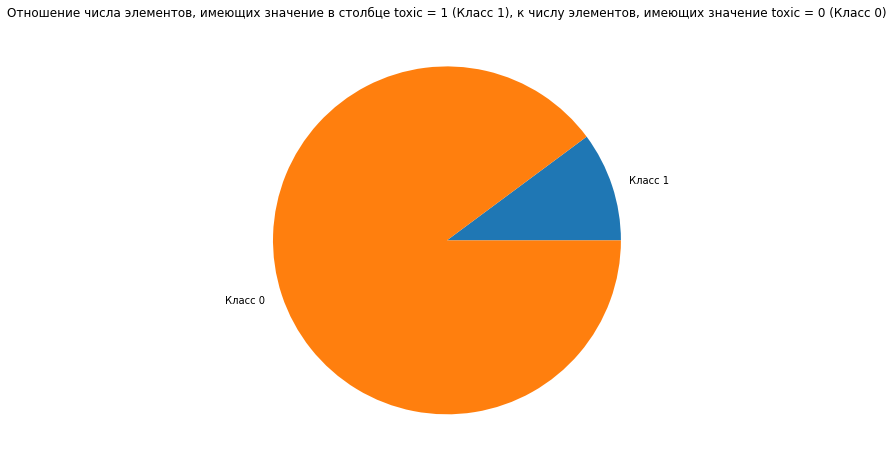

In [59]:

fig = plt.figure(figsize=(8, 8))
plt.title('Отношение числа элементов, имеющих значение в столбце toxic = 1 (Класс 1), \
к числу элементов, имеющих значение toxic = 0 (Класс 0)')
plt.pie([len(data.loc[data['toxic'] != 0, 'toxic']), len(data.loc[data['toxic'] == 0, 'toxic'])],
        labels=['Класс 1','Класс 0']);

In [60]:
data_sample = data.sample(2400, random_state=12345).reset_index(drop=True)# берем sample 2400 строк


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

    
    
    
Ошибка:  
    
    
Получается ты и тестовую выборку oversample, тем самым полностью исказив результаты (тут простая логика - реальные данные будут содержать дисбаланс, а test это имитация реального прогноза)
    
    

    
    
<div class="alert alert-warning">

    
    
    
Совет:
    
    
- Кстати валидационная тоже должна сохранить первоначальную диспропорцию. Можно [почитать](https://datascience.xyz/practice/kak-delat-kross-validaciju-pri-apsemplinge-dannyh.html) как надо делать (pipeline!)
    
    
- И так ли нам нужен oversampling!? Это скользкая дорожка, критический взгляд на [oversampling](https://habr.com/ru/post/349078/), 

<div class="alert alert-info"> 
    Привет, Марат! Спасибо, исправил.</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Привет Виктор!  



</div>


In [61]:
tokenizer = transformers.BertTokenizer.from_pretrained('unitary/toxic-bert') #  обученый токенизатор для BERT

In [62]:
tokenized = data_sample['cleared_text'].apply( # применяем токенизатор, ограничивая число токенов и укорачивая слишком длинный текст
    lambda x: tokenizer.encode(x, truncation=True, add_special_tokens=True, max_length=512))

In [63]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)# Пусть стандартной длиной векторов будет длина наибольшего во всём датасете вектора.

padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

attention_mask = np.where(padded != 0, 1, 0) #укажем нулевые и не нулевые значения токенов для вектора внимания

In [64]:
model = transformers.BertModel.from_pretrained('unitary/toxic-bert')#bert-base-uncased 

In [65]:
def batch_embedding(i, batch_size, attention_mask, model):
    batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) # преобразуем данные в формат тензоров
    attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
    with torch.no_grad():
        batch_embeddings = model(batch, attention_mask=attention_mask_batch) #эмбеддинги для батча
        
    return batch_embeddings[0][:,0,:].numpy()
    
    

In [66]:

batch_size = 32 # размер батча
embeddings = Parallel(n_jobs=6)(delayed(batch_embedding)(i, batch_size, attention_mask, model) 
                                for i in notebook.tqdm(range(padded.shape[0] // batch_size)))#список для хранения эмбеддингов    
 


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 


Обычно размер батча ставят 32 или 64 (кратное 2 в степени натурального числа).   Думаю это сократит время исполнения в кода


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Здорово что пробуешь Распараллелить процесс

<div class="alert alert-warning">



Совет 🤔:


    
Для ускорения можно использовать Колабе полоджив модель и джанные на GPU
    
[Google Colab для эффективного обучения](https://colab.research.google.com/)
    
[Как включить GPU в Google Colab](https://www.tutorialspoint.com/google_colab/google_colab_using_free_gpu.htm)
    
[Как BERT обучать на GPU](https://huggingface.co/docs/transformers/performance)    

In [67]:
features = np.concatenate(embeddings)
target = data_sample['toxic']

In [69]:
features_train_valid, features_test, target_train_valid, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345, stratify=target)# отделяем 80% данных для обучающей и валидацианной выборки


In [70]:
features_train_valid.shape

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


- random_state на месте


    
- плюс за  проверку
    
    
- здорово что используешь stratify    



1. Удален столбец `Unnamed: 0`, поскольку он не нужен для обучения моделей.
2. Получена выборка из 2400 строк таблицы.
3. Очистили тексты и создали признаки с помощью модели BERT.
4. Разделили данные на выборки для обучения, валидации и тестирования.

## Обучение

### Случайный лес

In [72]:
imba_pipeline = make_pipeline(SMOTE(random_state=12345), # для обучения на сбалансированных данных
                              RandomForestClassifier(random_state=12345))# cоздаем конвеер
params = {'max_depth':range(10, 20, 2), 'n_estimators':range(120, 200, 10)}
new_params = {'randomforestclassifier__' + key: params[key] for key in params}

grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=
                         StratifiedKFold(4, shuffle=True, random_state=12345), scoring='f1', n_jobs=-1)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:


Отличная реализация, теперь без утечки информации




</div>


In [73]:
%%time
grid_imba.fit(features_train_valid, target_train_valid)

In [74]:
best_forest = grid_imba.best_estimator_.named_steps['randomforestclassifier']# лучший лес
best_forest

In [75]:
score_forest = grid_imba.best_score_
print('Значение f1 для лучших параметров случайного леса на валидационных данных:', score_forest)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Корректно использован GridSearch 


- не забыт random_state


- scoring = 'f1'




### Логистическая регрессия

In [98]:
imba_pipeline = make_pipeline(SMOTE(random_state=12345), 
                              LogisticRegression(max_iter=1000, random_state=12345))
params = {'solver':['lbfgs', 'liblinear']}
new_params = {'logisticregression__' + key: params[key] for key in params}

grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=
                         StratifiedKFold(4, shuffle=True, random_state=12345), scoring='f1', n_jobs=-1)

In [100]:
%%time
grid_imba.fit(features_train_valid, target_train_valid)


In [101]:
best_lr = grid_imba.best_estimator_.named_steps['logisticregression']# лучшая регрессия
best_lr

In [102]:
score_lr = grid_imba.best_score_
print('Значение f1 для лучших параметров линейной регрессии на валидационных данных:', score_lr)

### LightGBM

In [105]:
imba_pipeline = make_pipeline(SMOTE(random_state=12345), 
                              LGBMClassifier(random_state=12345))
params = {'max_depth':range(10, 20, 2), 'n_estimators':range(120, 200, 10) }
new_params = {'lgbmclassifier__' + key: params[key] for key in params}

grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=
                         StratifiedKFold(4, shuffle=True, random_state=12345), scoring='f1', n_jobs=-1)

In [106]:
%%time
grid_imba.fit(features_train_valid, target_train_valid)

In [107]:
best_LGBM = grid_imba.best_estimator_.named_steps['lgbmclassifier']
best_LGBM

In [108]:
score_LGBM = grid_imba.best_score_
print('Значение f1 для лучших параметров LightGBM на валидационных данных:', score_LGBM)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Только не RMSE
</div>


In [116]:
model_compare= pd.DataFrame({'Название модели':['RandomForestClassifier', 'LogisticRegression', 'LGBMClassifier'],
                           'Значение f1': [score_forest, score_lr, score_LGBM]})

model_compare.sort_values(by=['Значение f1'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

## Тестирование

In [117]:
test_prediction = best_LGBM.predict(features_test)
best_model_score = f1_score(target_test, test_prediction)
print('Значение f1 для лучшей модели на тестовых данных:', best_model_score)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: 

- Все верно, логика моделирования не нарушена, тут тестируем только лучшую модель отобранную на валидации, или парочку лучших, если на валидации результаты близки

- Если студент получил на тесте f1 выше 0,75, это считается приемлемым результатом 



In [120]:
model = DummyClassifier(strategy='stratified', random_state=12345)

model.fit(features_train_valid, target_train_valid)

predicted_test = model.predict(features_test)
dummy_model_score = f1_score(target_test, predicted_test)
print('Значение f1 для DummyRegressor на тестовых данных:', dummy_model_score)

Лучшая модель дает значение f1 > 75 на тестовых данных, поэтому можно сделать вывод, что неплохо соблюдается баланс значений метрик Precision и Recall. Значение f1 для DummyClassifier меньше, чем для лучшей модели, это показывает адекватность модели.

## Выводы

Сделали сбалансированную выборку из 2400 строк, создали признаки с помощью модели BERT.
Быстрее всего обучилась модель LogisticRegression (DummyClassifier не учитываем) и дала самое маленькое значение f1 на валидационных данных. Модель RandomForest дала меньшее значение f1 для валидационных данных, чем LightGBM, обучалась и делала предсказания почти в 4 раз быстрее. LightGBM дала наибольшее значение f1 для валидационных данных, было показано, что эта модель адекватна и дает на тестовых данных f1 > 75, поэтому можно сделать вывод, что неплохо соблюдается баланс значений метрик Precision и Recall. 

(Recall используется для оценки доли ложно-отрицательных значений предсказания, если бы нам было нужно найти как можно больше токсичных комментариев, нужно было бы использовать эту метрику. Для максимизации Precision функция ошибок должна определять все положительные предсказания как истинно-положительное, для максимизации Recall функция ошибок должна определять все отрицательные предсказания как истинно-отрицательные. Если два условия, указанные выше, одновременно выполняются, то будет максимизация значения f1.)  

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


только у нас задачи классификации, поэтому никаких LinearRegression и DummyRegressor
</div>



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>


Здорово что использован модель Берт, очень модная тема сейчас, позволяющая получить отличные метрики.  Логика моделирования не нарушена, GS использован корректно




Что осталось из красного:


    
    
- oversample делаем только на тренировочном датасете    
    
    
Жду исправления для принятия проекта    


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

    
Красное исправлено, желтые советы использованы (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.



  
Отличная работа Виктор. Желаю успехов в дальнейшей учебе!


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны